In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [9]:
sns.set(palette='colorblind', font_scale=1.3)

In [10]:
assembly = 'GCA_000381985.1'
p = os.path.join(
    os.getcwd(),
    f'data/sequences/{assembly}/{assembly}_tri_nucleotide_distance_to_mean.csv',
)
df = pd.read_csv(p)
df.head()

,protein_id,distance,probability
0,KB907337.1_1,0.072647,0.927353
1,KB907337.1_2,0.082018,0.917982
2,KB907337.1_3,0.148301,0.851699
3,KB907337.1_4,0.126539,0.873461
4,KB907337.1_5,0.167576,0.832424


In [41]:
df.sort_values('distance').head()

,protein_id,distance,probability,p
3036,KB907348.1_12,0.031420,0.968580,0.134922
231,KB907337.1_232,0.034359,0.965641,0.157277
3124,KB907348.1_100,0.036779,0.963221,0.174293
2121,KB907342.1_149,0.037492,0.962508,0.179093
1887,KB907341.1_172,0.037527,0.962473,0.179326


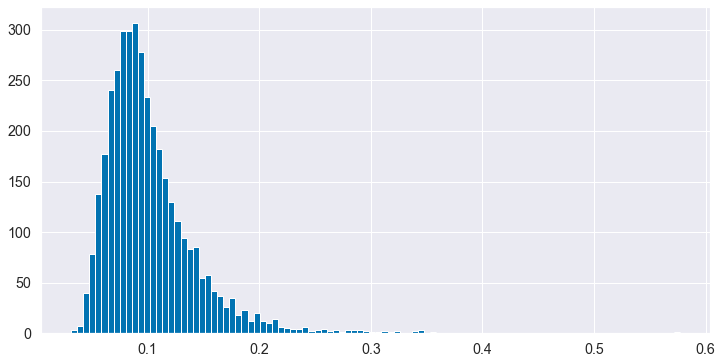

In [11]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
df['distance'].hist(ax=ax, bins=100);

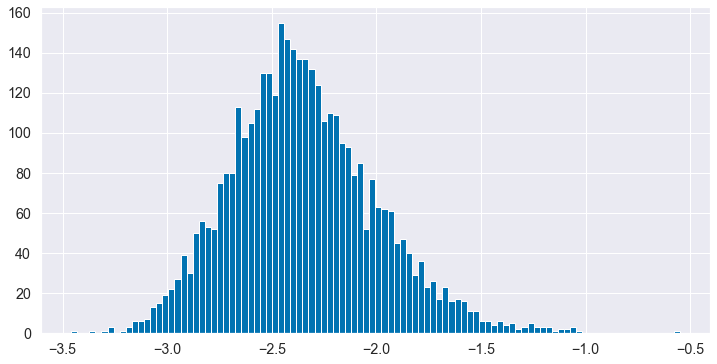

In [15]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(np.log(df['distance'].values), bins=100);

In [13]:
q = df['probability'].quantile(0.99)
v = df[df['probability'] > q]
1-q, q, len(v), 100 * len(v) / len(df)

(0.046974220000000066, 0.9530257799999999, 39, 1.0182767624020888)

In [44]:
log_dist = np.log(df['distance'].values)
np.amin(log_dist), np.amax(log_dist)

(-3.460310646154662, -0.550403600730388)

In [47]:
min_ = np.floor(np.min(log_dist))
max_ = 0.
min_, max_

(-4.0, 0.0)

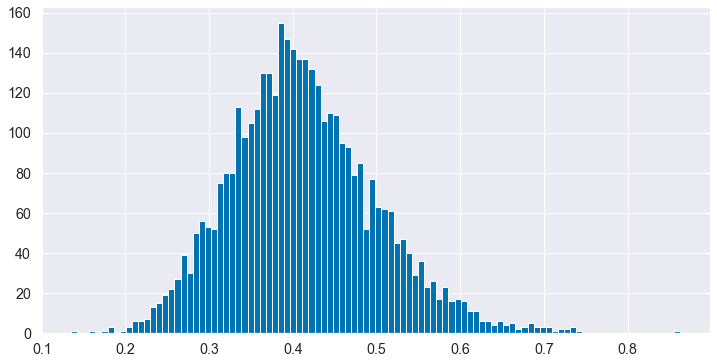

In [48]:
df['p'] = (np.log(df['distance'].values) - min_) / (max_ - min_)

_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(df['p'].values, bins=100);

In [49]:
df.sort_values('p').head()

,protein_id,distance,probability,p
3036,KB907348.1_12,0.031420,0.968580,0.134922
231,KB907337.1_232,0.034359,0.965641,0.157277
3124,KB907348.1_100,0.036779,0.963221,0.174293
2121,KB907342.1_149,0.037492,0.962508,0.179093
1887,KB907341.1_172,0.037527,0.962473,0.179326
